In [106]:
#! -*- coding: utf-8 -*-
import random
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
plt.style.use('ggplot')
%matplotlib inline

In [44]:
## get data
#file = open('/home/howie/code/python/frame/BJData.txt').read()
#raw_data = file.strip().split('\n')
#header = raw_data[0].strip().split('\t')
#data = np.array([x.strip().split('\t') for x in raw_data[1:]])

df = pd.read_csv('/home/howie/code/python/frame/BJData.txt', delimiter='\t')
df.head()

,district,type,rt1,rt2,rt3,rt4,rt5,rt6,rt7,price,...,attraction,building,busstop,community,mall,primaryschool,restaurant,secondaryschool,university,deltausers
0,东城区,纯住宅,1,1,1,1,1,0,1,54945,...,2,7,2,30,0,1,33,1,0,-124
1,朝阳区,写字楼,1,1,1,1,1,0,1,NaN,...,1,1,2,17,0,1,26,1,0,-106
2,朝阳区,写字楼,1,1,1,1,1,0,0,NaN,...,1,9,2,20,2,0,46,1,0,-227
3,东城区,纯住宅,0,1,1,1,1,1,0,49000,...,1,7,3,57,0,1,14,0,0,-41
4,东城区,商住两用,1,1,0,1,1,1,1,42000,...,2,2,2,67,0,2,3,0,0,-26


In [45]:
# data preprocessing
df = df.dropna()
le = preprocessing.LabelEncoder()
df['district'] = le.fit_transform(df['district'])
df['type'] = le.fit_transform(df['type'])
df.head()

,district,type,rt1,rt2,rt3,rt4,rt5,rt6,rt7,price,...,attraction,building,busstop,community,mall,primaryschool,restaurant,secondaryschool,university,deltausers
0,0,3,1,1,1,1,1,0,1,54945,...,2,7,2,30,0,1,33,1,0,-124
3,0,3,0,1,1,1,1,1,0,49000,...,1,7,3,57,0,1,14,0,0,-41
4,0,2,1,1,0,1,1,1,1,42000,...,2,2,2,67,0,2,3,0,0,-26
6,4,2,1,1,1,1,1,0,0,52000,...,1,5,3,50,0,1,24,1,0,-47
7,0,2,1,1,1,1,0,1,1,65000,...,5,8,5,6,0,0,48,0,0,-74


In [97]:
## XGBoost model
'''
y = df['deltausers']
X = df[list(set(df.columns) - set(['deltausers']))]
rng = np.random.RandomState(31337)
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)


X2 = np.array(X)
y2 = np.array(y)
kf2 = KFold(y2.shape[0], n_folds=2, shuffle=True, random_state=rng)
print X2.shape, y2.shape
for train_index, test_index in kf2:
    xgb_model = xgb.XGBClassifier().fit(X2[train_index],y2[train_index])
    predictions = xgb_model.predict(X2[test_index])
'''
mat = np.array(df)
headers = list(df.columns)
X = mat[:, :-1]
y = mat[:, -1]
rng = np.random.RandomState(31337)
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)

xgb_model = xgb.XGBRegressor().fit(X, y)

'''
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    print predictions
'''

'\nfor train_index, test_index in kf:\n    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])\n    predictions = xgb_model.predict(X[test_index])\n    print predictions\n'

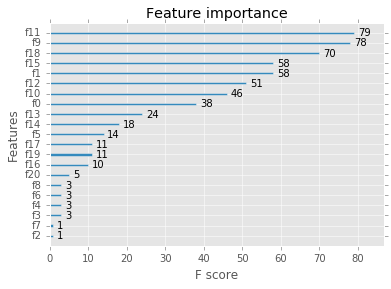

In [117]:
xgb.plot_importance(xgb_model)
plt.figure(figsize=(12,10))
plt.show()

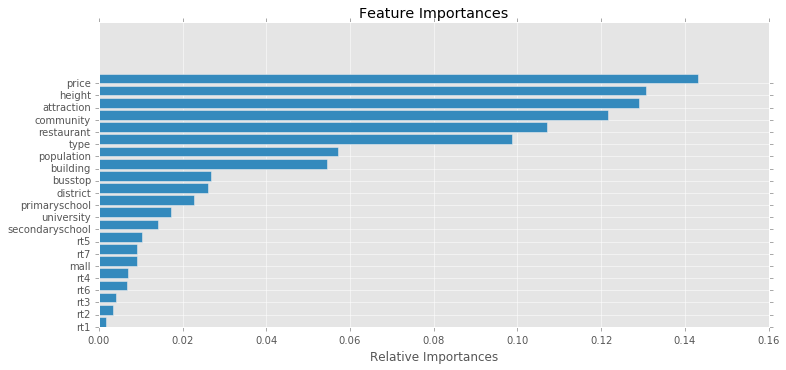

In [125]:
## sklearn RandomForest Model
rf = RandomForestRegressor()
rf.fit(X, y)
#rf_predictions = rf.predict(test)
rf_feature_importances = rf.feature_importances_
#rfscore = rf.score(test, testLabels)
#print 'Random Forest Score:', rfscore
rf_featimpo = zip(rf_feature_importances, headers[:-1])
rf_featimpo.sort()
plt.figure(figsize=(12,12))
ax = plt.subplot(2, 1, 2)
ax.barh(range(len(rf_featimpo)), [x[0] for x in rf_featimpo])
ax.set_title('Feature Importances')
ax.set_xlabel('Relative Importances')
plt.yticks(range(len(rf_featimpo)), [x[1] for x in rf_featimpo])

plt.show()

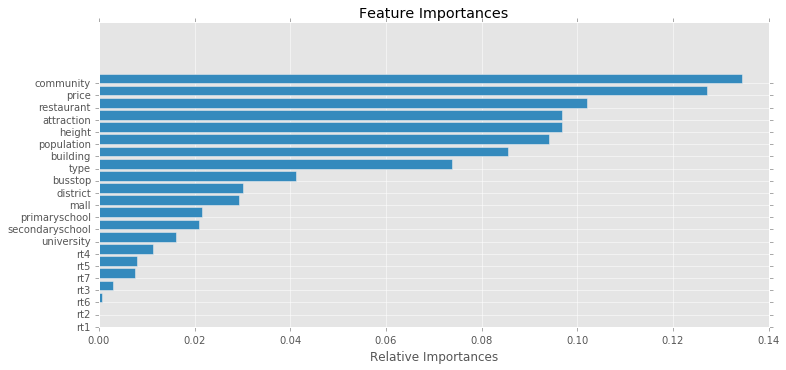

In [127]:
## sklearn GBM
gbm = GradientBoostingRegressor()
gbm.fit(X, y)
#gbm_predictions = gbm.predict(test)
gbm_feature_importances = gbm.feature_importances_
#gbmscore = gbm.score(test, testLabels)
#print 'Gradient Boosting Machine Score:', gbmscore
gbm_featimpo = zip(gbm_feature_importances, headers[:-1])
gbm_featimpo.sort()
plt.figure(figsize=(12,12))
ax = plt.subplot(2, 1, 2)
ax.barh(range(len(gbm_featimpo)), [x[0] for x in gbm_featimpo])
ax.set_title('Feature Importances')
ax.set_xlabel('Relative Importances')
plt.yticks(range(len(gbm_featimpo)), [x[1] for x in gbm_featimpo])
plt.show()

In [132]:
train = df[list(set(df.columns) - set(['deltausers','rt1','rt2','rt3','rt4','rt5','rt6','rt7']))]
train

,building,district,restaurant,price,secondaryschool,community,height,attraction,mall,primaryschool,busstop,type,university,population
0,7,0,33,54945,1,30,14.0,2,0,1,2,3,0,469.00
3,7,0,14,49000,0,57,7.0,1,0,1,3,3,0,193.00
4,2,0,3,42000,0,67,15.0,2,0,2,2,2,0,3960.00
6,5,4,24,52000,1,50,24.0,1,0,1,3,2,0,2640.00
7,8,0,48,65000,0,6,8.0,5,0,0,5,2,0,5280.00
8,6,4,7,47609,2,18,15.0,2,1,2,1,2,0,6600.00
9,0,4,19,46000,0,167,14.0,0,0,0,1,3,0,1092.00
10,2,4,3,49300,1,28,13.5,8,2,1,0,2,0,1320.00
11,5,4,8,49500,0,13,18.0,9,1,1,2,2,0,1320.00
12,8,4,61,60000,0,21,14.5,1,1,0,2,3,0,9800.00
